In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv("./조업편차분석.csv")

x = data.drop(columns=['No.','A1']).to_numpy()
y = data['A1'].to_numpy()

train_ratio = 0.8
train_size = int(x.shape[0] * train_ratio)

In [49]:
def standarize(train, test):
    mean = np.mean(train)
    std = np.std(train)

    scaled_train = (train - mean) / std
    scaled_test = (test- mean) / std

    return scaled_train, scaled_test

In [50]:
x_train, x_test = standarize(x[:train_size], x[train_size:])
y_train, y_test = standarize(y[:train_size], y[train_size:])
y_train, y_test = y_train.reshape(-1, 1), y_test.reshape(-1, 1)

C:\Users\USER\AppData\Local\Temp\ipykernel_16200\345075146.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


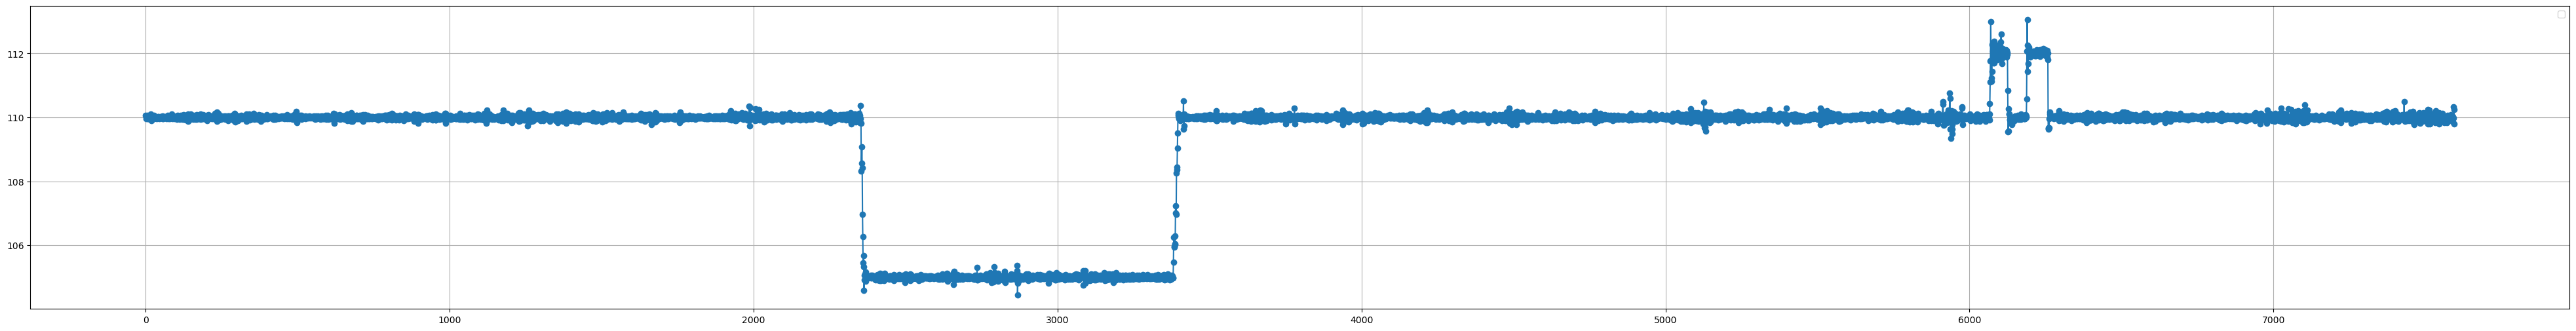

In [51]:
plt.figure(figsize=(50, 6))
plt.plot(y.flatten(), marker="o")
plt.legend()
plt.grid()
plt.show()

In [52]:
def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return (1 - tanh(z)) ** 2

def mse(pred, true):
    return np.sum((pred - true) ** 2) / len(true)

def mse_derivative(pred, true):
    return 2 * (pred - true) / true.shape[0]

In [53]:
input_dim = x_train.shape[1]
hidden_dim = 64
output_dim = y_train.shape[1]

w_x = np.random.uniform(low=-1, high=1, size=(hidden_dim, input_dim)) * 0.1
w_h = np.random.uniform(low=-1, high=1, size=(hidden_dim, hidden_dim)) * 0.1
w_y = np.random.uniform(low=-1, high=1, size=(output_dim, hidden_dim)) * 0.1

b_h = np.random.uniform(low=-1, high=1, size=(hidden_dim, 1)) * 0.1
b_y = np.random.uniform(low=-1, high=1, size=(output_dim, 1)) * 0.1

In [54]:
def forward_prop(x, hidden_dim, w_x, w_h, w_y, b_h, b_y):
    h_states = []
    outputs = []
    h_prev = np.zeros((hidden_dim, 1))

    for t in range(x.shape[0]):
        x_t = x[t].reshape(-1, 1)
        h_t = np.tanh(np.dot(w_x, x_t) + np.dot(w_h, h_prev) + b_h)
        y_t = np.dot(w_y, h_t) + b_y

        h_states.append(h_t)
        outputs.append(y_t)

    return h_states, outputs

C:\Users\USER\AppData\Local\Temp\ipykernel_16200\3020834478.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


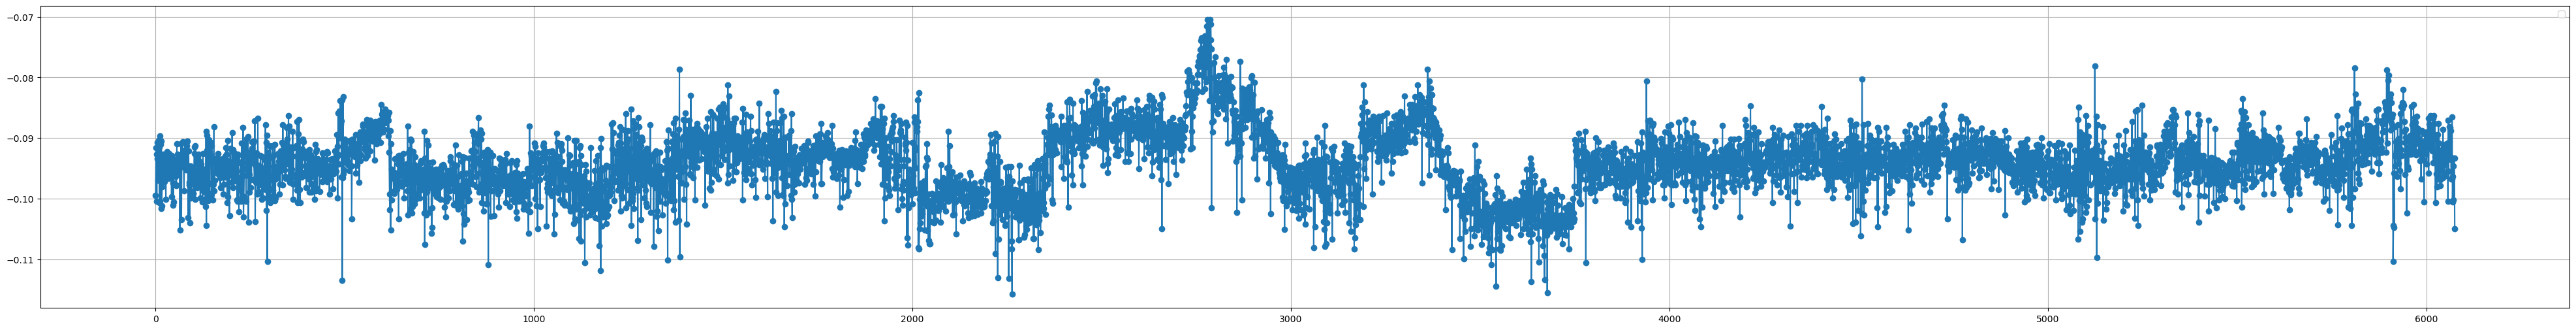

In [55]:
h_states, y_pred = forward_prop(x_train, hidden_dim, w_x, w_h, w_y, b_h, b_y)

plt.figure(figsize=(50, 6))
plt.plot(np.array(y_pred).flatten(), marker="o")
plt.legend()
plt.grid()
plt.show()

In [ ]:
def backward_prop(x, y_pred, y_true, h_states, w_x, w_h, w_y, b_h, b_y, lr):
    dw_x = np.zeros_like(w_x)
    dw_h = np.zeros_like(w_h)
    dw_y = np.zeros_like(w_y)
   
    db_h = np.zeros_like(b_h)
    db_y = np.zeros_like(b_y)
    
    dh_next = np.zeros((hidden_dim, 1))

    for t in reversed(x.shape[0]):
        x_t = x[t].reshape(-1, 1)
        h_t = h_states[t]
        h_prev = h_states[t - 1] if t > 0 else np.zeros((hidden_dim, 1))

        dy_t = y_pred[t] - y_true[t]
        dw_y += np.dot(dy, h_t.T)
        db_y += dy_t

        dh_t = np.dot(w_y.T, dy_t) + dh_next
        dh_raw = dh_t * tanh_derivative(h_t)

        dw_x += np.dot(dh_raw, x_t.T)
        dw_h += np.dot(dh_raw, h_prev.T)
        db_h += dh_raw

        dh_next = np.dot(w_h.T, dh_raw)

    w_x -= lr * dw_x
    w_h -= lr * dw_h
    w_y -= lr * dw_y
    b_h -= lr * db_h
    b_y -= lr * db_y

    return w_x, w_h, w_y, b_h, b_y

In [ ]:
epochs = 200
lr = 0.001
loss_list = []

for epoch in range(epochs):
    h_states, y_pred = forward_prop(x_train, w_x, w_h, w_y, b_h, b_y)
    loss = mse(y_pred, y_train)
    loss_list.append(loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}, Loss: {loss}")